In [2]:
!pip install l0bnb
from l0bnb import fit_path

In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path,
      summarize)

# 1

We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2, . . . , p predictors. Explain your answers:

a. Which of the three models with k predictors has the smallest training RSS?\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The model with kk predictors from best subset selection will have the smallest training RSS among the three models with kk predictors, as it considers all possible combinations of predictors, potentially providing the best fit.

b. Which of the three models with k predictors has the smallest test RSS?\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The model with kk predictors from forward stepwise selection will likely have the smallest test RSS. Forward stepwise selection adds predictors sequentially, starting with the most important ones, which helps prevent overfitting compared to the best subset approach.



True or False:\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k +1)-variable
model identified by forward stepwise selection.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;__true__

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. The predictors in the k-variable model identified by back-
ward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;__false__

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii. The predictors in the k-variable model identified by back-
ward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;__false__

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k +1)-variable
model identified by backward stepwise selection.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;__false__

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;v. The predictors in the k-variable model identified by best
subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;__true__

# 2

a. The lasso, relative to least square, is:

b. Repeat (a) for ridge regression relative to least squares.

c. Repeat (a) for non-linear methods relative to least squares.

# 8

a. Create a random number generator and use its normal() method
to generate a predictor X of length n = 100, as well as a noise
vector " of length n = 100.

In [69]:
# Set seed for reproducibility
np.random.seed(42)

# Parameters
n = 100
mean_x, std_x = 0, 1  # Mean and standard deviation for X
mean_noise, std_noise = 0, 1  # Mean and standard deviation for noise

# Generate predictor X and noise vector
X = np.random.normal(mean_x, std_x, n)
noise = np.random.normal(mean_noise, std_noise, n)

# Display the first 10 values for verification
print("Predictor X (first 10):", X[:10])
print("Noise vector (first 10):", noise[:10])


Predictor X (first 10): [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]
Noise vector (first 10): [-1.41537074 -0.42064532 -0.34271452 -0.80227727 -0.16128571  0.40405086
  1.8861859   0.17457781  0.25755039 -0.07444592]


b. Generate a response vector Y of length n = 100 according to the model where β0, β1, β2, and β3 are constants of your choice.

In [74]:
# Constants for the model
beta_0 = 5     # Intercept
beta_1 = 2.5   # Coefficient for X
beta_2 = -1.3  # Coefficient for X^2
beta_3 = 0.7   # Coefficient for X^3

# Generate the response vector Y
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + noise

# Display the first 10 values for verification
print("Response vector Y (first 10):", Y[:10])

Response vector Y (first 10): [ 4.59145845  4.20699156  5.92135019  7.46278675  4.17306803  4.73845753
 10.34902458  6.64391149  3.72490382  6.01107128]


c. Use forward stepwise selection in order to select a model contain-
ing the predictors X, X2, . . . , X10. What is the model obtained
according to Cp? Report the coefficients of the model obtained.

In [73]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from itertools import combinations

# # Step 1: Generate the matrix of predictors X, X^2, ..., X^10
# X_poly = np.column_stack([X**i for i in range(1, 11)])  # X^1 to X^10

# # Step 2: Define Cp function
# def nCp(sigma2, estimator, X, Y):
#     """Negative Cp statistic"""
#     n, p = X.shape
#     Yhat = estimator.predict(X)
#     RSS = np.sum((Y - Yhat)**2)
#     return -(RSS + 2 * p * sigma2) / n

# # Forward stepwise selection
# n, p = X_poly.shape
# sigma2 = np.var(noise)  # Noise variance estimate

# best_model = None
# best_score = float('-inf')
# best_features = []

# # Iteratively add predictors
# selected_features = []
# remaining_features = list(range(p))

# for _ in range(p):
#     scores = []
#     models = []

#     for feature in remaining_features:
#         current_features = selected_features + [feature]
#         X_subset = X_poly[:, current_features]
        
#         model = LinearRegression().fit(X_subset, Y)
#         score = nCp(sigma2, model, X_subset, Y)

#         scores.append(score)
#         models.append((current_features, model))

#     # Choose the best model in this step
#     best_index = np.argmax(scores)
#     best_features, best_model = models[best_index]

#     # Update the selected and remaining features
#     selected_features = best_features
#     remaining_features = [f for f in remaining_features if f not in selected_features]

# # Step 3: Display the coefficients of the best model
# print("Best model according to Cp:")
# print("Selected features (X powers):", [f + 1 for f in selected_features])

# # Display model coefficients
# best_X = X_poly[:, best_features]
# final_model = LinearRegression().fit(best_X, Y)

# coefficients = pd.DataFrame({
#     "Feature": [f"X^{f + 1}" for f in selected_features],
#     "Coefficient": final_model.coef_
# })
# print(coefficients)
# print("\nIntercept:", final_model.intercept_)


In [84]:
from functools import partial

# Step 1: Generate the matrix of predictors X^1 to X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])
X_df = pd.DataFrame(X_poly, columns=[f'X^{i+1}' for i in range(10)])

# Step 2: Model Specification
design = MS(X_df.columns).fit(X_df)

# Step 3: Fit the model and calculate sigma2
X_transformed = design.transform(X_df)
sigma2 = OLS(Y, X_transformed).fit().scale

# Step 4: Define negative Cp
def nCp(sigma2, estimator, X, Y):
    """Negative Cp statistic"""
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

neg_Cp = partial(nCp, sigma2)

# Step 5: Perform forward stepwise selection
forward_strategy = Stepwise.first_peak(
    design, direction='forward', max_terms=len(design.terms)
)

# Fit using Cp
model_Cp = sklearn_selected(OLS, forward_strategy, scoring=neg_Cp)
model_Cp.fit(X_df, Y)

model_Cp

sklearn_selected(model_type=<class 'statsmodels.regression.linear_model.OLS'>,
                 scoring=functools.partial(<function nCp at 0x0000020D02468720>, 0.8737538686644163),
                 strategy=Strategy(initial_state=(), candidate_states=<bound method Stepwise.candidate_states of <ISLP.models.strategy.Stepwise object at 0x0000020D02ADE240>>, build_submodel=<bound method ModelSpec.build_submodel of ModelSpec(terms=Index(['X^1', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7', 'X^8', 'X^9', 'X^10'], dtype='object'))>, check_finished=<function first_peak at 0x0000020D7F7A2F20>, postprocess=<function _postprocess_best at 0x0000020D7F7A31A0>))

In [79]:
# Step 1: Perform backward stepwise selection
backward_strategy = Stepwise.first_peak(
    design, direction='backward', max_terms=len(design.terms)
)

# Fit using Cp
model_backward = sklearn_selected(OLS, backward_strategy, scoring=neg_Cp)
model_backward.fit(X_df, Y)

# Display the selected model and coefficients
print("\n✅ Backward Stepwise Selection (Cp):")
print("Selected Features:", model_backward.selected_state_)

# Display the coefficients of the Cp-selected model
backward_model = model_backward.estimator_
for name, coef in zip(design.terms, backward_model.coef_):
    print(f"{name}: {coef}")
print("\nIntercept:", backward_model.intercept_)



✅ Backward Stepwise Selection (Cp):
Selected Features: ()


AttributeError: 'sklearn_selected' object has no attribute 'estimator_'

In [99]:
from functools import partial
import numpy as np
import pandas as pd

# Re-generate X and Y from parts (a) and (b)
np.random.seed(42)

n = 100
X = np.random.normal(0, 1, n)
noise = np.random.normal(0, 1, n)

# Constants for the model
beta_0 = 5
beta_1 = 2.5
beta_2 = -1.3
beta_3 = 0.7

# Generate Y based on the model Y = beta_0 + beta_1 * X + beta_2 * X^2 + beta_3 * X^3 + noise
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + noise

# Step 1: Create polynomial features X^1 to X^10
X_poly = np.column_stack([X**i for i in range(1, 11)])

# Convert the feature matrix to a DataFrame for model fitting
X_df = pd.DataFrame(X_poly, columns=[f'X^{i+1}' for i in range(10)])

# Step 2: Model Specification using ISLP's MS
design = MS(X_df.columns).fit(X_df)

# Step 3: Fit the OLS model and calculate sigma^2 (error variance)
X_transformed = design.transform(X_df)
sigma2 = OLS(Y, X_transformed).fit().scale

# Step 4: Define the negative Cp function
def nCp(sigma2, estimator, X, Y):
    """Negative Cp statistic"""
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

# Using `partial` to pass the `sigma2` value to `nCp`
neg_Cp = partial(nCp, sigma2)

# Step 5: Perform forward stepwise selection using ISLP's Stepwise
forward_strategy = Stepwise.first_peak(
    design, direction='forward', max_terms=len(design.terms)
)

# Step 6: Get the selected features and coefficients
selected_features = model_Cp.selected_state_
print("\n✅ Forward Stepwise Selection (Cp):")
print("Selected Features:", selected_features)

# Access the fitted model and display the coefficients
cp_model = model_Cp.model_
print("\n📊 Model Summary:")
print(cp_model.summary())  # This should give the summary including the coefficients

# Display the coefficients directly if needed
print("\n📊 Coefficients:")
for name, coef in zip(selected_features, cp_model.params[1:]):  # Skipping intercept
    print(f"{name}: {coef}")
print("\nIntercept:", cp_model.params[0])


✅ Forward Stepwise Selection (Cp):
Selected Features: ('X^1', 'X^2', 'X^3')

📊 Model Summary:


AttributeError: 'OLS' object has no attribute 'summary'

d. Repeat (c), using backwards stepwise selection. How does your
answer compare to the results in (c)?

e. Now fit a lasso model to the simulated data, again using X, X2,
. . . , X10 as predictors. Use cross-validation to select the optimal
value of λ. Create plots of the cross-validation error as a function
of λ. Report the resulting coefficient estimates, and discuss the
results obtained.

f. Now generate a response vector Y according to the model
Y = β0 + β7X7 + epsilon,
and perform forward stepwise selection and the lasso. Discuss
the results obtained.

In [ ]:
#extra stuff
sigma2 = OLS(y,X).fit().scale

def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

neg_Cp = partial(nCp, sigma2)

# 9

a. Split the data set into a training set and a test set.

In [4]:
from sklearn.model_selection import train_test_split

islpCollege = pd.DataFrame(load_data("College"))

train, test = train_test_split(islpCollege, test_size=0.3, random_state=1)
islpCollege

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


b. Fit a linear model using least squares on the training set, and
report the test error obtained.

In [5]:
import statsmodels.api as sm
X = islpCollege.drop(columns=["Apps", "Private"])
y = islpCollege["Apps"]

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
Accept,1.6064,0.041,39.568,0.000
Enroll,-0.9310,0.187,-4.977,0.000
Top10perc,53.1788,5.423,9.806,0.000
Top25perc,-16.4049,4.438,-3.697,0.000
F.Undergrad,0.0797,0.033,2.443,0.015
P.Undergrad,0.0505,0.032,1.557,0.120
Outstate,-0.1109,0.018,-6.137,0.000
Room.Board,0.1129,0.048,2.371,0.018
Books,-0.1340,0.234,-0.571,0.568
Personal,-0.0130,0.061,-0.214,0.831


<!--  -->

c. Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.

In [6]:
#XXX might just straight be outdated
Xnp = X.to_numpy()
Xs = Xnp - Xnp.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale.to_numpy()[None,:]
lambdas = 10**np.linspace(8, -2, 100) / y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape

c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9311256588.670948, tolerance: 1862392.4681000002
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\linear_model\_coor

(16, 100)

In [7]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=X.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path


,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
negative log(lambda),,,,,,,,,,,,,,,,
-10.159619,0.141114,0.126659,0.050677,0.052592,0.121823,0.059567,0.007501,0.024669,0.019826,0.026732,0.058432,0.055261,0.014305,-0.013497,0.038826,0.021949
-9.927035,0.178060,0.159820,0.063944,0.066360,0.153717,0.075161,0.009464,0.031127,0.025016,0.033730,0.073729,0.069727,0.018050,-0.017031,0.048990,0.027696
-9.694450,0.224677,0.201660,0.080683,0.083731,0.193960,0.094837,0.011940,0.039276,0.031565,0.042560,0.093029,0.087979,0.022776,-0.021491,0.061815,0.034946
-9.461866,0.283494,0.254451,0.101802,0.105647,0.244734,0.119662,0.015065,0.049556,0.039827,0.053700,0.117378,0.111006,0.028739,-0.027118,0.077995,0.044094
-9.229281,0.357705,0.321056,0.128446,0.133298,0.308795,0.150983,0.019005,0.062527,0.050250,0.067755,0.148098,0.140057,0.036263,-0.034219,0.098410,0.055635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.935895,3900.155900,-826.912164,876.250958,-284.636303,354.108694,75.960136,-439.618170,148.181832,-1.513174,21.304487,-110.843457,-20.190107,91.229554,-14.514940,427.975271,138.125357
12.168479,3900.202499,-826.979555,876.267420,-284.648354,354.132680,75.960539,-439.625468,148.179439,-1.513597,21.305249,-110.845601,-20.188905,91.229297,-14.510595,427.974517,138.124279
12.401063,3900.239430,-827.032966,876.280467,-284.657904,354.151691,75.960858,-439.631252,148.177542,-1.513932,21.305854,-110.847299,-20.187952,91.229093,-14.507152,427.973919,138.123425


<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\aster\AppData\Local\Temp\ipykernel_12468\874725204.py:3: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


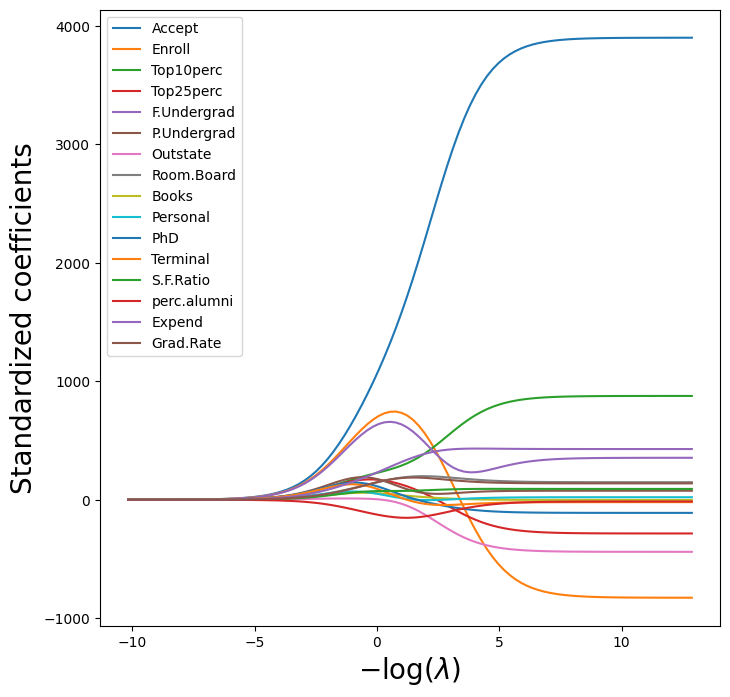

In [8]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');


In [9]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(2.9707936396120203,
 Accept         623.247192
 Enroll         493.674771
 Top10perc      164.857459
 Top25perc      154.007554
 F.Undergrad    462.977583
 P.Undergrad    180.186356
 Outstate        10.631406
 Room.Board      92.539625
 Books           55.876065
 Personal        69.609071
 PhD            143.938121
 Terminal       130.148408
 S.F.Ratio       58.483396
 perc.alumni    -76.185285
 Expend         143.429548
 Grad.Rate       89.510713
 Name: -1.0888291358426299, dtype: float64)

In [10]:
np.linalg.norm(beta_hat)


1010.9268918066176

In [11]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)


(0.02835766483752449, 3349.2694727586713)

In [12]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, y)


c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.692e+08, tolerance: 1.162e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.02835766483752449, l1_ratio=0))])

In [13]:
np.linalg.norm(ridge.coef_)

3347.7876149849267

In [14]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']
# print("Test error is: ", results)


c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.160e+08, tolerance: 5.879e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([1244770.18685586])

d. Fit a lasso model on the training set, with λ chosen by cross-
validation. Report the test error obtained, along with the num-
ber of non-zero coefficient estimates

In [16]:
design = MS(islpCollege.columns.drop('Apps')).fit(islpCollege)

Y = np.array(islpCollege['Apps'])
# X = design.transform(islpCollege)
# sigma2 = OLS(Y,X).fit().scale

strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

hitters_MSE = sklearn_selected(OLS,
                               strategy)
hitters_MSE.fit(islpCollege, Y)
hitters_MSE.selected_state_

('Accept',
 'Books',
 'Enroll',
 'Expend',
 'F.Undergrad',
 'Grad.Rate',
 'Outstate',
 'P.Undergrad',
 'Personal',
 'PhD',
 'Private',
 'Room.Board',
 'S.F.Ratio',
 'Terminal',
 'Top10perc',
 'Top25perc',
 'perc.alumni')

In [17]:
strategy = Stepwise.fixed_steps(design,
                                len(design.terms),
                                direction='forward')
full_path = sklearn_selection_path(OLS, strategy)

full_path.fit(islpCollege, Y)
Yhat_in = full_path.predict(islpCollege)
Yhat_in.shape


(777, 18)

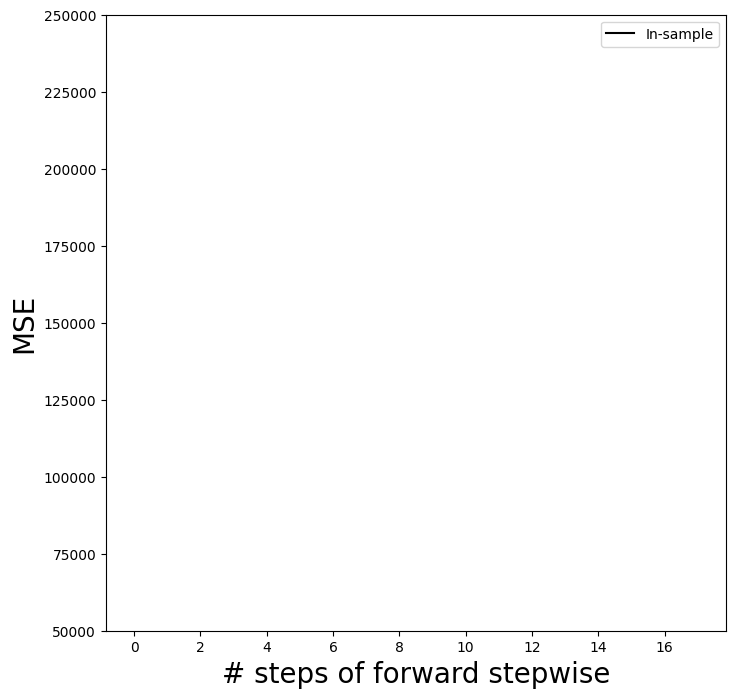

In [18]:
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
              fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim([50000,250000]);


In [19]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_


NameError: name 'kfold' is not defined

e. Fit a PCR model on the training set, with M chosen by cross-
validation. Report the test error obtained, along with the value
of M selected by cross-validation

In [20]:
K = 5 #THIS WILL CHANGE LATER
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)

In [21]:
pca = PCA(n_components=2)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([0.02562361, 0.62025096])

In [22]:
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([ 555.88863318, 1562.19866974])

In [23]:
param_grid = {'pca__n_components': range(1, 20)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)


c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 95.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aster\anaconda3\envs\islp2\Lib\site-packages\sklearn\pipeline.py", lin

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

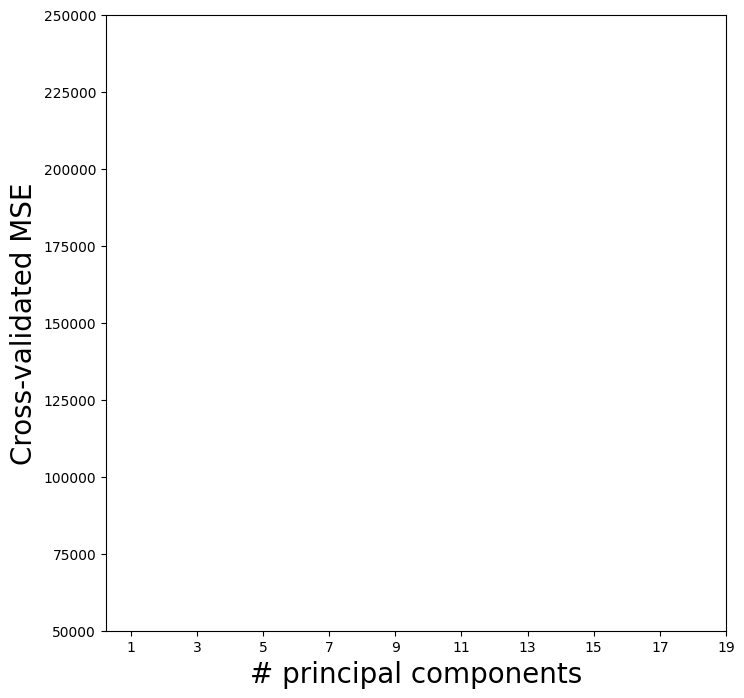

In [24]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([50000,250000]);

In [25]:
Xn = np.zeros((X.shape[0], 1))
cv_null = skm.cross_validate(linreg,
                             Xn,
                             Y,
                             cv=kfold,
                             scoring='neg_mean_squared_error')
-cv_null['test_score'].mean()


14986195.511757474

In [26]:
pipe.named_steps['pca'].explained_variance_ratio_


array([0.32769119, 0.24306309])

g. Comment on the results obtained. How accurately can we pre-
dict the number of college applications received? Is there much
difference among the test errors resulting from these five ap-
proaches?